In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_table('fruit_data_with_colors.txt')

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [6]:
label_data=dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))

In [7]:
label_data

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [8]:
apple_data=df[df["fruit_name"]=="apple"]

In [9]:
apple_data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89
10,1,apple,braeburn,166,6.9,7.3,0.93
11,1,apple,braeburn,172,7.1,7.6,0.92
12,1,apple,braeburn,154,7.0,7.1,0.88
13,1,apple,golden_delicious,164,7.3,7.7,0.70
14,1,apple,golden_delicious,152,7.6,7.3,0.69


In [10]:
df.fruit_subtype.unique()

array(['granny_smith', 'mandarin', 'braeburn', 'golden_delicious',
       'cripps_pink', 'spanish_jumbo', 'selected_seconds', 'turkey_navel',
       'spanish_belsan', 'unknown'], dtype=object)

In [11]:
group_data=df.groupby("fruit_name")

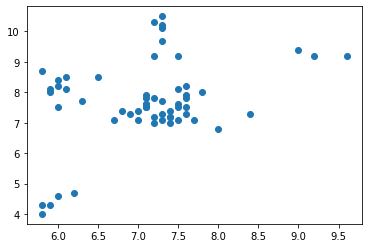

In [12]:
plt.scatter(df["width"],df["height"])

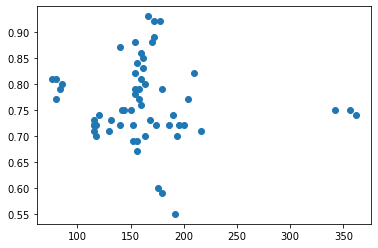

In [13]:
plt.scatter(df['mass'],df['color_score'])

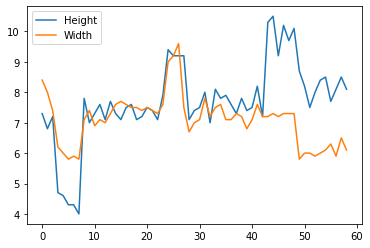

In [14]:
plt.plot(df['height'],label='Height')
plt.plot(df['width'],label='Width')
plt.legend()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
X=df[['mass','width','height']]
Y=df['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [17]:
knn=KNeighborsClassifier(n_neighbors=1)

In [22]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

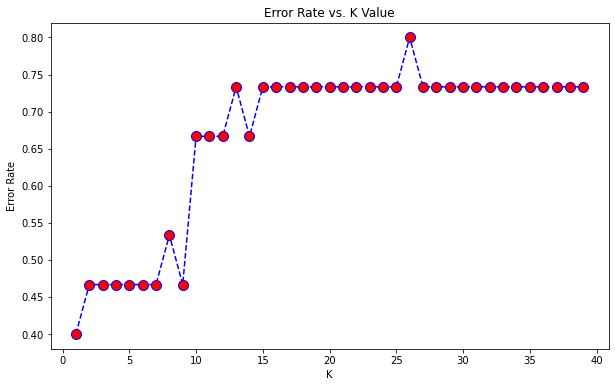

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
knn.score(X_test,y_test)

0.5333333333333333

In [20]:
prediction1=knn.predict([['100','6.3','8']])

E:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [21]:
prediction1[0]

4

In [24]:
knn=KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred = knn.predict(X_test)

In [28]:
knn.score(X_test,y_test)

0.6

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       1.00      1.00      1.00         1
           3       0.62      0.62      0.62         8
           4       1.00      0.50      0.67         2

    accuracy                           0.60        15
   macro avg       0.76      0.66      0.68        15
weighted avg       0.64      0.60      0.61        15



# After Applying Standard Scaler

In [33]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler.fit(df.drop(["fruit_label","fruit_name","fruit_subtype"],axis=1))

StandardScaler()

In [45]:
scaled_features=scaler.transform(df.drop(["fruit_label","fruit_name","fruit_subtype"],axis=1))

In [46]:
scaled_features

array([[ 0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [ 0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [ 0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-1.45037224, -1.36432727, -2.29223608,  0.35587203],
       [-1.52369868, -1.6112454 , -2.51455158,  0.09341641],
       [-1.52369868, -1.48778634, -2.51455158,  0.61832765],
       [-1.59702513, -1.6112454 , -2.73686708,  0.61832765],
       [ 0.27279923, -0.00627758,  0.07912925,  2.06183356],
       [ 0.16280957,  0.36409961, -0.51371209,  1.66815013],
       [ 0.0528199 , -0.25319571, -0.29139659,  2.19306137],
       [ 0.16280957, -0.00627758, -0.06908109,  2.06183356],
       [-0.16715944, -0.12973664, -0.43960692,  1.53692232],
       [ 0.01615667,  0.24064055,  0.00502408, -0.82517826],
       [-0.20382266,  0.61101774, -0.29139659, -0.95640607],
       [-0.13049622,  0.7344768 , -0.43960692, -0.95640607],
       [-0.13049622,  0.

In [48]:
df.columns[3:]

Index(['mass', 'width', 'height', 'color_score'], dtype='object')

In [49]:
scaled_df=pd.DataFrame(scaled_features,columns=df.columns[3:])

In [50]:
scaled_df.head()

,mass,width,height,color_score
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['fruit_label'],
                                                    test_size=0.30)

In [68]:
knn=KNeighborsClassifier(n_neighbors=2)

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [70]:
k_predict=knn.predict(X_test)

In [71]:
print(classification_report(y_test,k_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       0.80      1.00      0.89         4

    accuracy                           0.94        18
   macro avg       0.95      0.92      0.92        18
weighted avg       0.96      0.94      0.94        18



In [72]:
print(confusion_matrix(y_test,k_predict))

[[9 0 0 0]
 [0 2 0 0]
 [0 0 2 1]
 [0 0 0 4]]


In [57]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

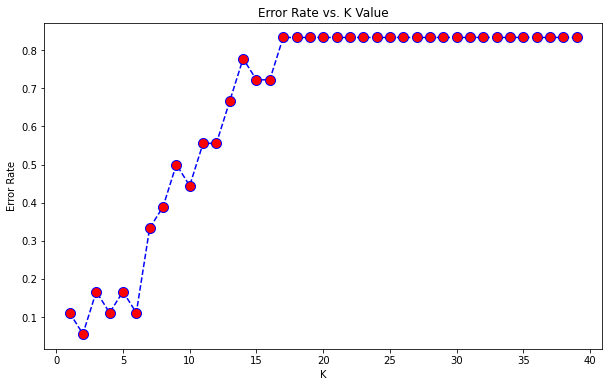

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')